# 국제 축구 경기 분석
- 1872년부터 2018년까지 전 세계에서 개최된 국제 축구 대회 데이터를 분석한다.
- https://footystats.org/kr/download-stats-csv?season=-1
- 데이터셋에 6년간 대한민국 축구팀 경기 결과를 분석해 봅시다.

## 필수 라이브러리 로딩

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Word Cloud(or Tag Cloud, 태그 클라우두)
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/9d/06/059a7e33548acf6c7bd29f96b2e495571797b4397353bf79631559b97948/wordcloud-1.9.2-cp38-cp38-win_amd64.whl.metadata
   ---------------------------------------- 0.0/153.1 kB ? eta -:--:--
   ---------------------------------------- 153.1/153.1 kB 3.0 MB/s eta 0:00:00


In [3]:
import seaborn as sns
from wordcloud import WordCloud
# 한글 패키지 konlpy

- 라이브러리 or 모듈 : 파일명.py

## 데이터셋 로딩

In [4]:
soccer = pd.read_csv('soccer.csv')

# 탐색적 데이터 분석(EDA)

## 데이터셋의 기본정보 확인

In [5]:
soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41540 entries, 0 to 41539
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        41540 non-null  object
 1   home_team   41540 non-null  object
 2   away_team   41540 non-null  object
 3   home_score  41540 non-null  int64 
 4   away_score  41540 non-null  int64 
 5   tournament  41540 non-null  object
 6   city        41540 non-null  object
 7   country     41540 non-null  object
 8   neutral     41540 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [6]:
soccer.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [10]:
# date 컬럼에 데이터타입을 날짜와 시간형식으로 변경
#soccer.astype(['date':'datetime64[ns]'])
soccer.date = pd.to_datetime(soccer.date)

In [11]:
soccer.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [12]:
soccer.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [13]:
# date 컬럼을 기준으로 내림차순 정렬
# 정렬 결과를 soccer 데이터셋에 저장
soccer.sort_values(by='date', ascending=False)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
41539,2019-11-19,Lebanon,North Korea,0,0,FIFA World Cup qualification,Beirut,Lebanon,False
41517,2019-11-19,U.S. Virgin Islands,Saint Martin,1,2,CONCACAF Nations League,Upper Bethlehem,U.S. Virgin Islands,False
41515,2019-11-19,Saint Lucia,Montserrat,0,1,CONCACAF Nations League,Gros Islet,Saint Lucia,False
41514,2019-11-19,El Salvador,Dominican Republic,2,0,CONCACAF Nations League,San Salvador,El Salvador,False
41513,2019-11-19,Mexico,Bermuda,2,1,CONCACAF Nations League,Mexico City,Mexico,False
...,...,...,...,...,...,...,...,...,...
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False


## 인사이트 도출
1. 홈경기와 원정경기의 결과를 분석

In [14]:
# 홈경기와 원정경기를 분석
## 경기가 진행된 중립지역을 나타내는 컬럼의 값이 False인 것만
## 홈에서 이루어진 경기의 결과를 승(팀명)과 패를 담는 파생변수를 생성.

In [41]:
soccer['winner'] = np.random.rand(len(soccer.home_score))

for i in range(len(soccer)):
    if soccer.home_score[i] > soccer.away_score[i]:
        soccer.winner[i] = 1
    elif soccer.home_score[i] < soccer.away_score[i]:
        soccer.winner[i] = -1
    else:
        soccer.winner[i] = 0
soccer.winner = soccer.winner.astype(int)

In [26]:
# 홈에서 승률이 더 높을까?
## 홈에서의 승률을 계산해야 winner의 총 합이 양수이면 홈에서의 승률이 더 높다고 판단.
## 팀별로 어디서 승률이 더 높은지 계산

In [42]:
soccer['winner_la'] = np.random.rand(len(soccer.home_score))

for i in range(len(soccer)):
    if soccer.home_score[i] > soccer.away_score[i]:
        soccer.winner_la[i] = 'win'
    elif soccer.home_score[i] < soccer.away_score[i]:
        soccer.winner_la[i] = 'defeat'
    else:
        soccer.winner_la[i] = 'tie'

In [75]:
soccer.head(50)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,winner_la
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1,win
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,1,win
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,-1,defeat
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,-1,defeat
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,1,win
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,1,win


<Axes: title={'center': '1. Distribution of home team result'}, xlabel='winner_la', ylabel='Count'>

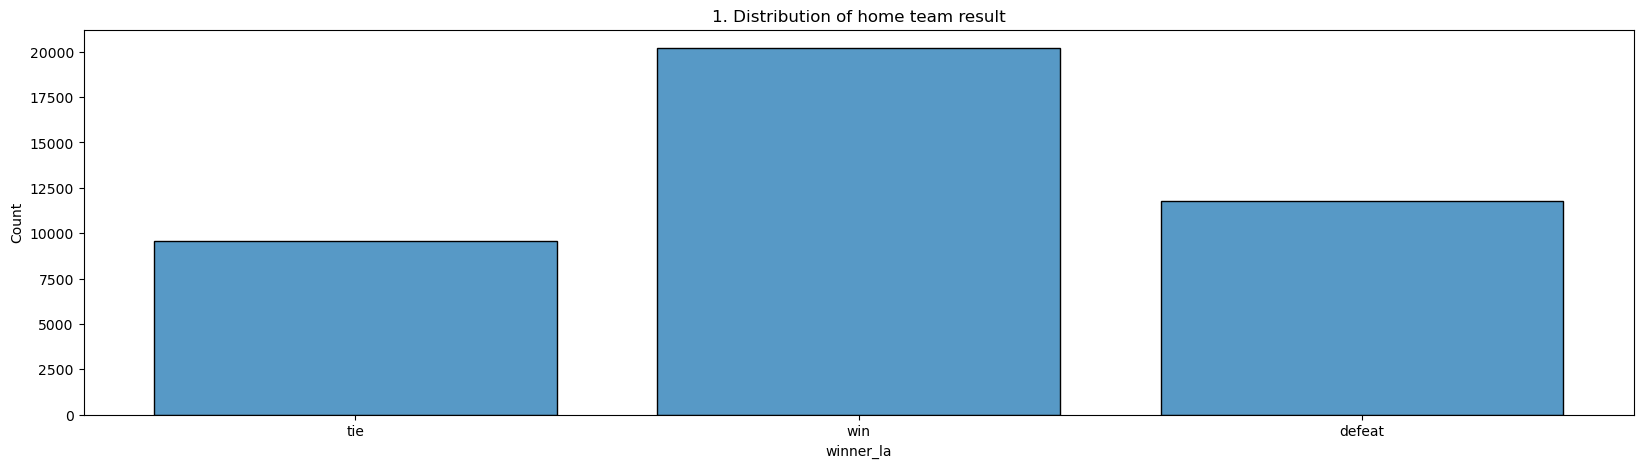

In [117]:
plt.figure(figsize=(20, 5))
plt.title('1. Distribution of home team result')
sns.histplot(data=soccer.winner_la, shrink=.8)

<Axes: title={'center': '2. status of play result by home_team'}, xlabel='home_team', ylabel='Count'>

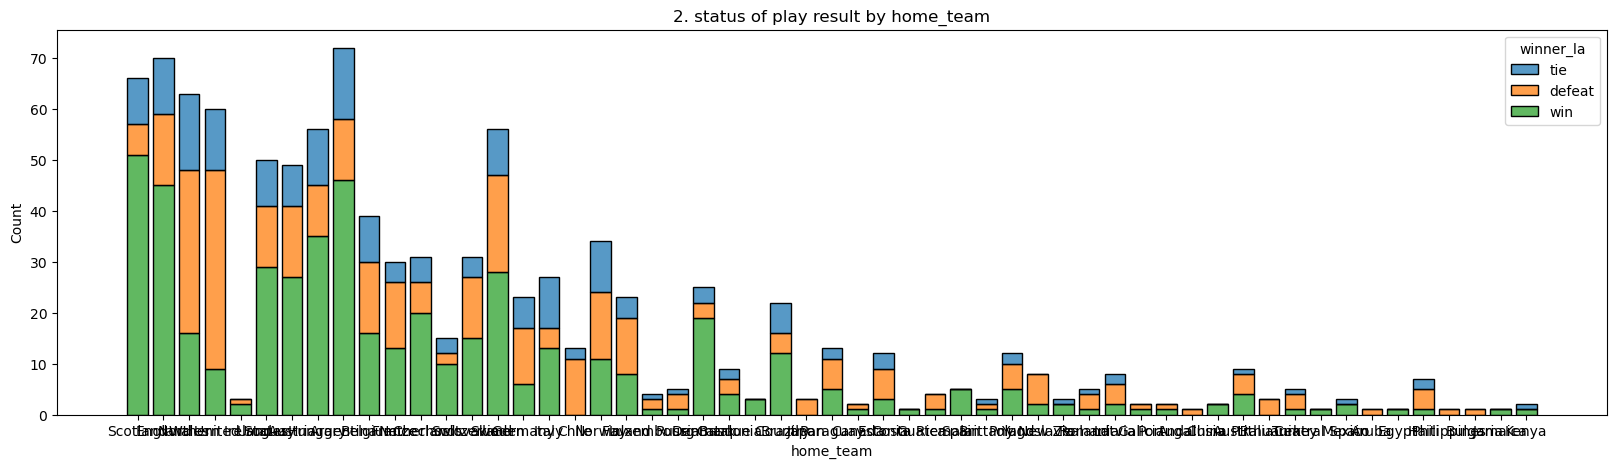

In [118]:
# 팀별로 홈에서 승률이 높은지

plt.figure(figsize=(20, 5))
plt.title('2. status of play result by home_team')
sns.histplot(data=soccer.iloc[:1000,:], x="home_team", hue="winner_la", multiple="stack", hue_order=['tie','defeat','win'], shrink=.8)


- 팀별로 나눠서 봤을 때도 같은 결과를 볼 수 있었다. 몇 팀은 예외가 있었지만.
- 팀의 입장에서 봤을때, 홈에서 경기했을때 경기 결과가 더 좋았음을 알 수 있다.

In [79]:
soccer['goalcount']=soccer.home_score + soccer.away_score

In [82]:
soccer.describe()

,home_score,away_score,winner,goalcount
count,41540.000000,41540.000000,41540.000000,41540.000000
mean,1.745643,1.187819,0.203515,2.933462
std,1.753444,1.405511,0.853301,2.092864
min,0.000000,0.000000,-1.000000,0.000000
25%,1.000000,0.000000,-1.000000,1.000000
50%,1.000000,1.000000,0.000000,3.000000
75%,2.000000,2.000000,1.000000,4.000000
max,31.000000,21.000000,1.000000,31.000000


In [99]:
soccer.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,winner_la,goalcount
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,tie,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1,win,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,tie,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1,win,3
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,1,win,4
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,-1,defeat,4
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,-1,defeat,2
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,1,win,9
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,1,win,9


In [104]:
# 경기 타입별 골수
data = soccer.pivot_table(index='tournament', columns='winner_la', values='goalcount')

In [105]:
data

winner_la,defeat,tie,win
tournament,,,
ABCS Tournament,4.800000,2.800000,3.600000
AFC Asian Cup,2.991150,1.720930,2.929825
AFC Asian Cup qualification,3.293103,1.642276,3.850117
AFC Challenge Cup,2.891892,1.600000,2.953488
AFC Challenge Cup qualification,3.636364,1.444444,3.346154
...,...,...,...
Viva World Cup,4.684211,4.000000,4.970588
WAFF Championship,2.193548,1.083333,2.857143
West African Cup,2.500000,2.823529,2.571429


<Axes: xlabel='winner_la', ylabel='tournament'>

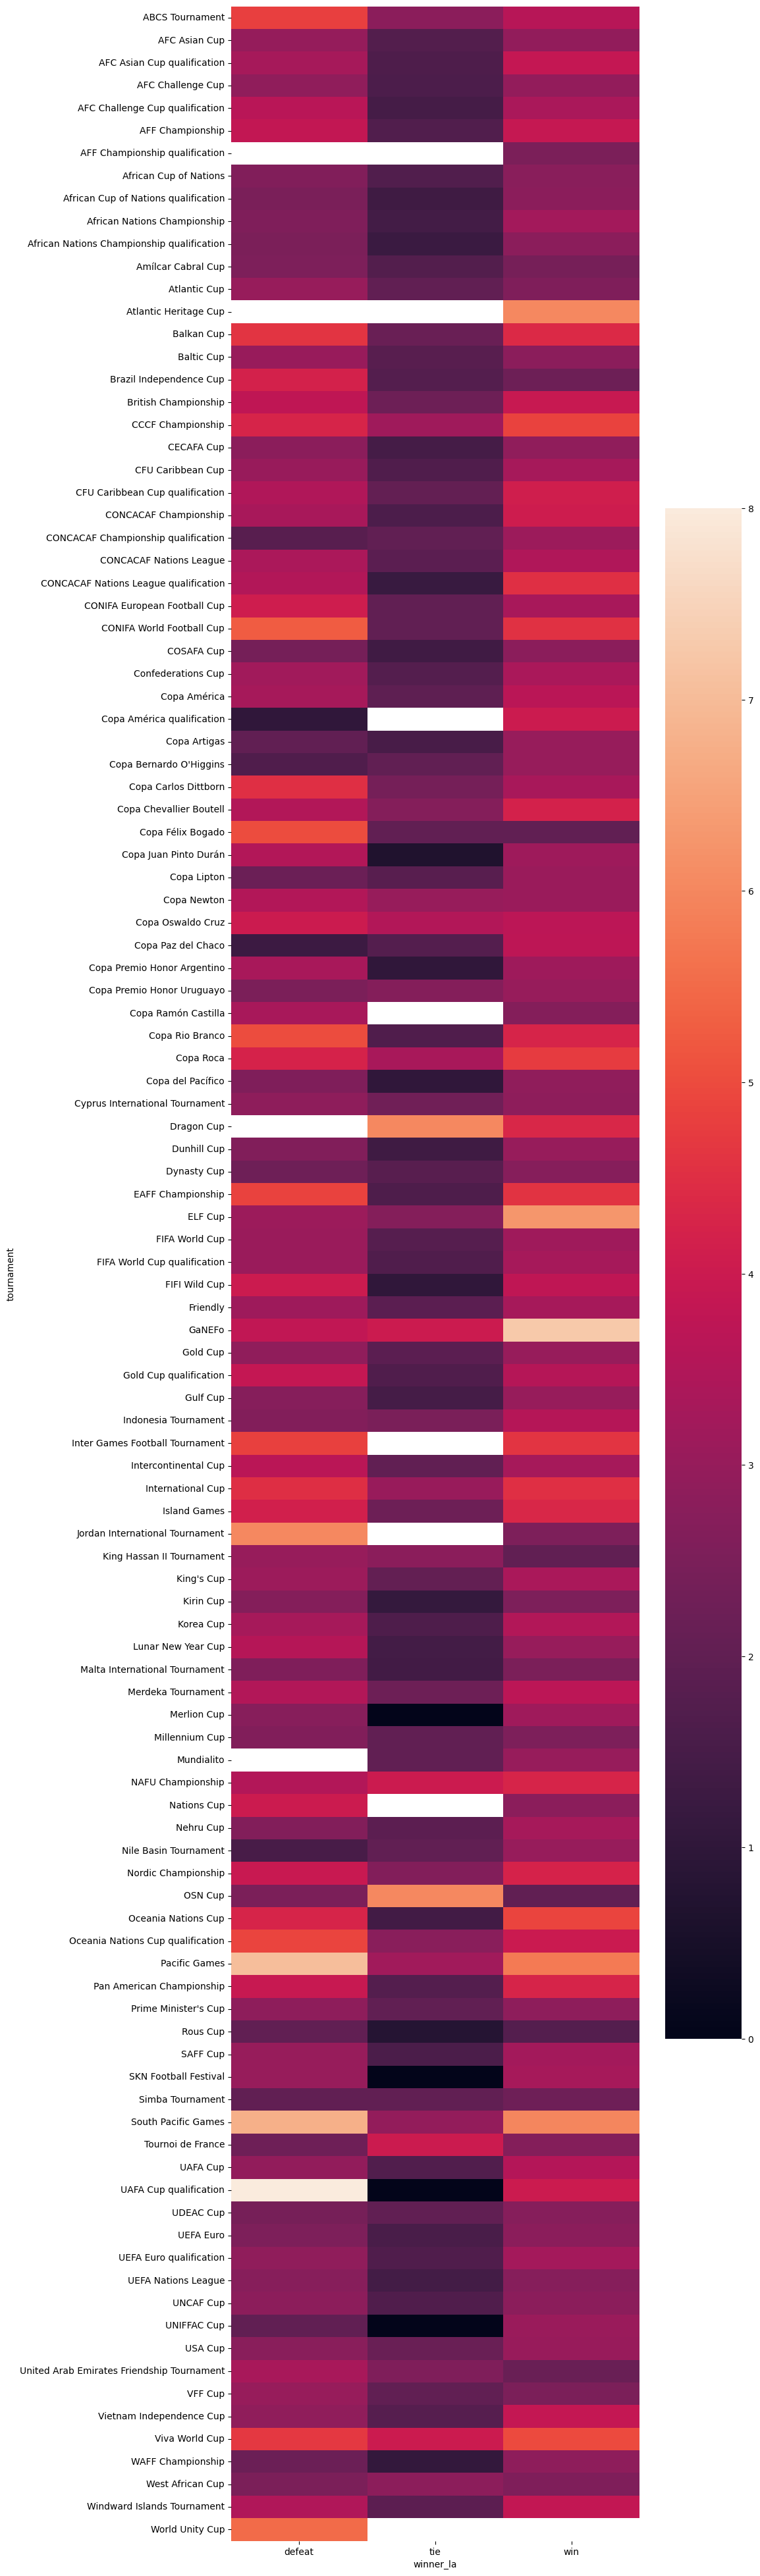

In [109]:
plt.figure(figsize=(10, 50))
sns.heatmap(data)

- 위 그림은 경기 타입별로 골수의 평균을 나타낸 히트맵 그래프이다.
- 대부분의 경기 타입에서 비겼을 경우 총 골수가 적게 나온 것을 알 수 있다.
- 특징적인 것은 'AFF Championship'과 'Atlantic Heritage Cup'은 홈팀이 지거나 비길 경우 양 팀의 골수가 많이 나왔다는 것을 알 수 있다.

In [113]:
soccer[soccer.tournament.isin(['AFF Championship', 'Atlantic Heritage Cup'])].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 19834 to 40629
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        295 non-null    datetime64[ns]
 1   home_team   295 non-null    object        
 2   away_team   295 non-null    object        
 3   home_score  295 non-null    int64         
 4   away_score  295 non-null    int64         
 5   tournament  295 non-null    object        
 6   city        295 non-null    object        
 7   country     295 non-null    object        
 8   neutral     295 non-null    bool          
 9   winner      295 non-null    int32         
 10  winner_la   295 non-null    object        
 11  goalcount   295 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int32(1), int64(3), object(6)
memory usage: 26.8+ KB


- 'AFF Championship'과 'Atlantic Heritage Cup'만 필터링해서 데이터를 살펴본 결과 싱가포르와 버마에서 열린 경기인데 두 경기를 합쳐 총 12경기밖에 없었기 때문에 유의미한 결과라고 볼 수 없었다. (데이터셋의 총 경기수 : 41540건)

In [122]:
soccer_resent = soccer[soccer.date > '2000-01-01']
soccer_resent.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,winner_la,goalcount
22440,2000-01-04,Egypt,Togo,2,1,Friendly,Aswan,Egypt,False,1,win,3
22441,2000-01-07,Tunisia,Togo,7,0,Friendly,Tunis,Tunisia,False,1,win,7
22442,2000-01-08,Trinidad and Tobago,Canada,0,0,Friendly,Port of Spain,Trinidad and Tobago,False,0,tie,0
22443,2000-01-09,Burkina Faso,Gabon,1,1,Friendly,Ouagadougou,Burkina Faso,False,0,tie,2
22444,2000-01-09,Guatemala,Armenia,1,1,Friendly,Los Angeles,United States,True,0,tie,2


In [125]:
soccer_resent.tournament.unique()

array(['Friendly', 'African Cup of Nations',
       'AFC Asian Cup qualification', 'Nordic Championship',
       'Cyprus International Tournament', 'Lunar New Year Cup',
       'Malta International Tournament', 'Gold Cup', "King's Cup",
       'FIFA World Cup qualification', 'COSAFA Cup',
       'Oceania Nations Cup qualification', 'Baltic Cup',
       'Amílcar Cabral Cup', 'WAFF Championship', 'USA Cup',
       'King Hassan II Tournament', 'UEFA Euro', 'Kirin Cup',
       'Oceania Nations Cup', 'African Cup of Nations qualification',
       'Merdeka Tournament', 'United Arab Emirates Friendship Tournament',
       'AFC Asian Cup', 'AFF Championship', 'CECAFA Cup',
       'Millennium Cup', 'CFU Caribbean Cup qualification',
       'Windward Islands Tournament', 'CFU Caribbean Cup', 'UNCAF Cup',
       'Confederations Cup', 'Island Games', 'Copa América',
       'SKN Football Festival', 'Gold Cup qualification',
       "Prime Minister's Cup", 'Gulf Cup', 'FIFA World Cup',
       'UEFA E

In [127]:
soccer_resent_t = soccer_resent[soccer_resent.tournament == 'FIFA World Cup']
soccer_resent_t.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,winner_la,goalcount
24777,2002-05-31,France,Senegal,0,1,FIFA World Cup,Seoul,South Korea,True,-1,defeat,1
24778,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,Sapporo,Japan,True,1,win,8
24779,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,Niigata,Japan,True,0,tie,2
24780,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,Ulsan,South Korea,True,-1,defeat,3
24781,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,Kashima,Japan,True,1,win,1


In [130]:
soccer_resent_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 24777 to 39932
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        320 non-null    datetime64[ns]
 1   home_team   320 non-null    object        
 2   away_team   320 non-null    object        
 3   home_score  320 non-null    int64         
 4   away_score  320 non-null    int64         
 5   tournament  320 non-null    object        
 6   city        320 non-null    object        
 7   country     320 non-null    object        
 8   neutral     320 non-null    bool          
 9   winner      320 non-null    int32         
 10  winner_la   320 non-null    object        
 11  goalcount   320 non-null    int64         
 12  winteam     320 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int32(1), int64(3), object(6)
memory usage: 31.6+ KB


In [144]:
pivot2 = soccer_resent_t.pivot_table(index='home_team', columns='away_team', values='winner', aggfunc='sum')
pivot2

away_team,Algeria,Angola,Argentina,Australia,Belgium,Bosnia and Herzegovina,Brazil,Cameroon,Chile,China PR,...,Spain,Sweden,Switzerland,Togo,Trinidad and Tobago,Tunisia,Turkey,Ukraine,United States,Uruguay
home_team,,,,,,,,,,,,,,,,,,,,,
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belgium,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brazil,NaN,NaN,NaN,1.0,0.0,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
Cameroon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chile,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='away_team', ylabel='home_team'>

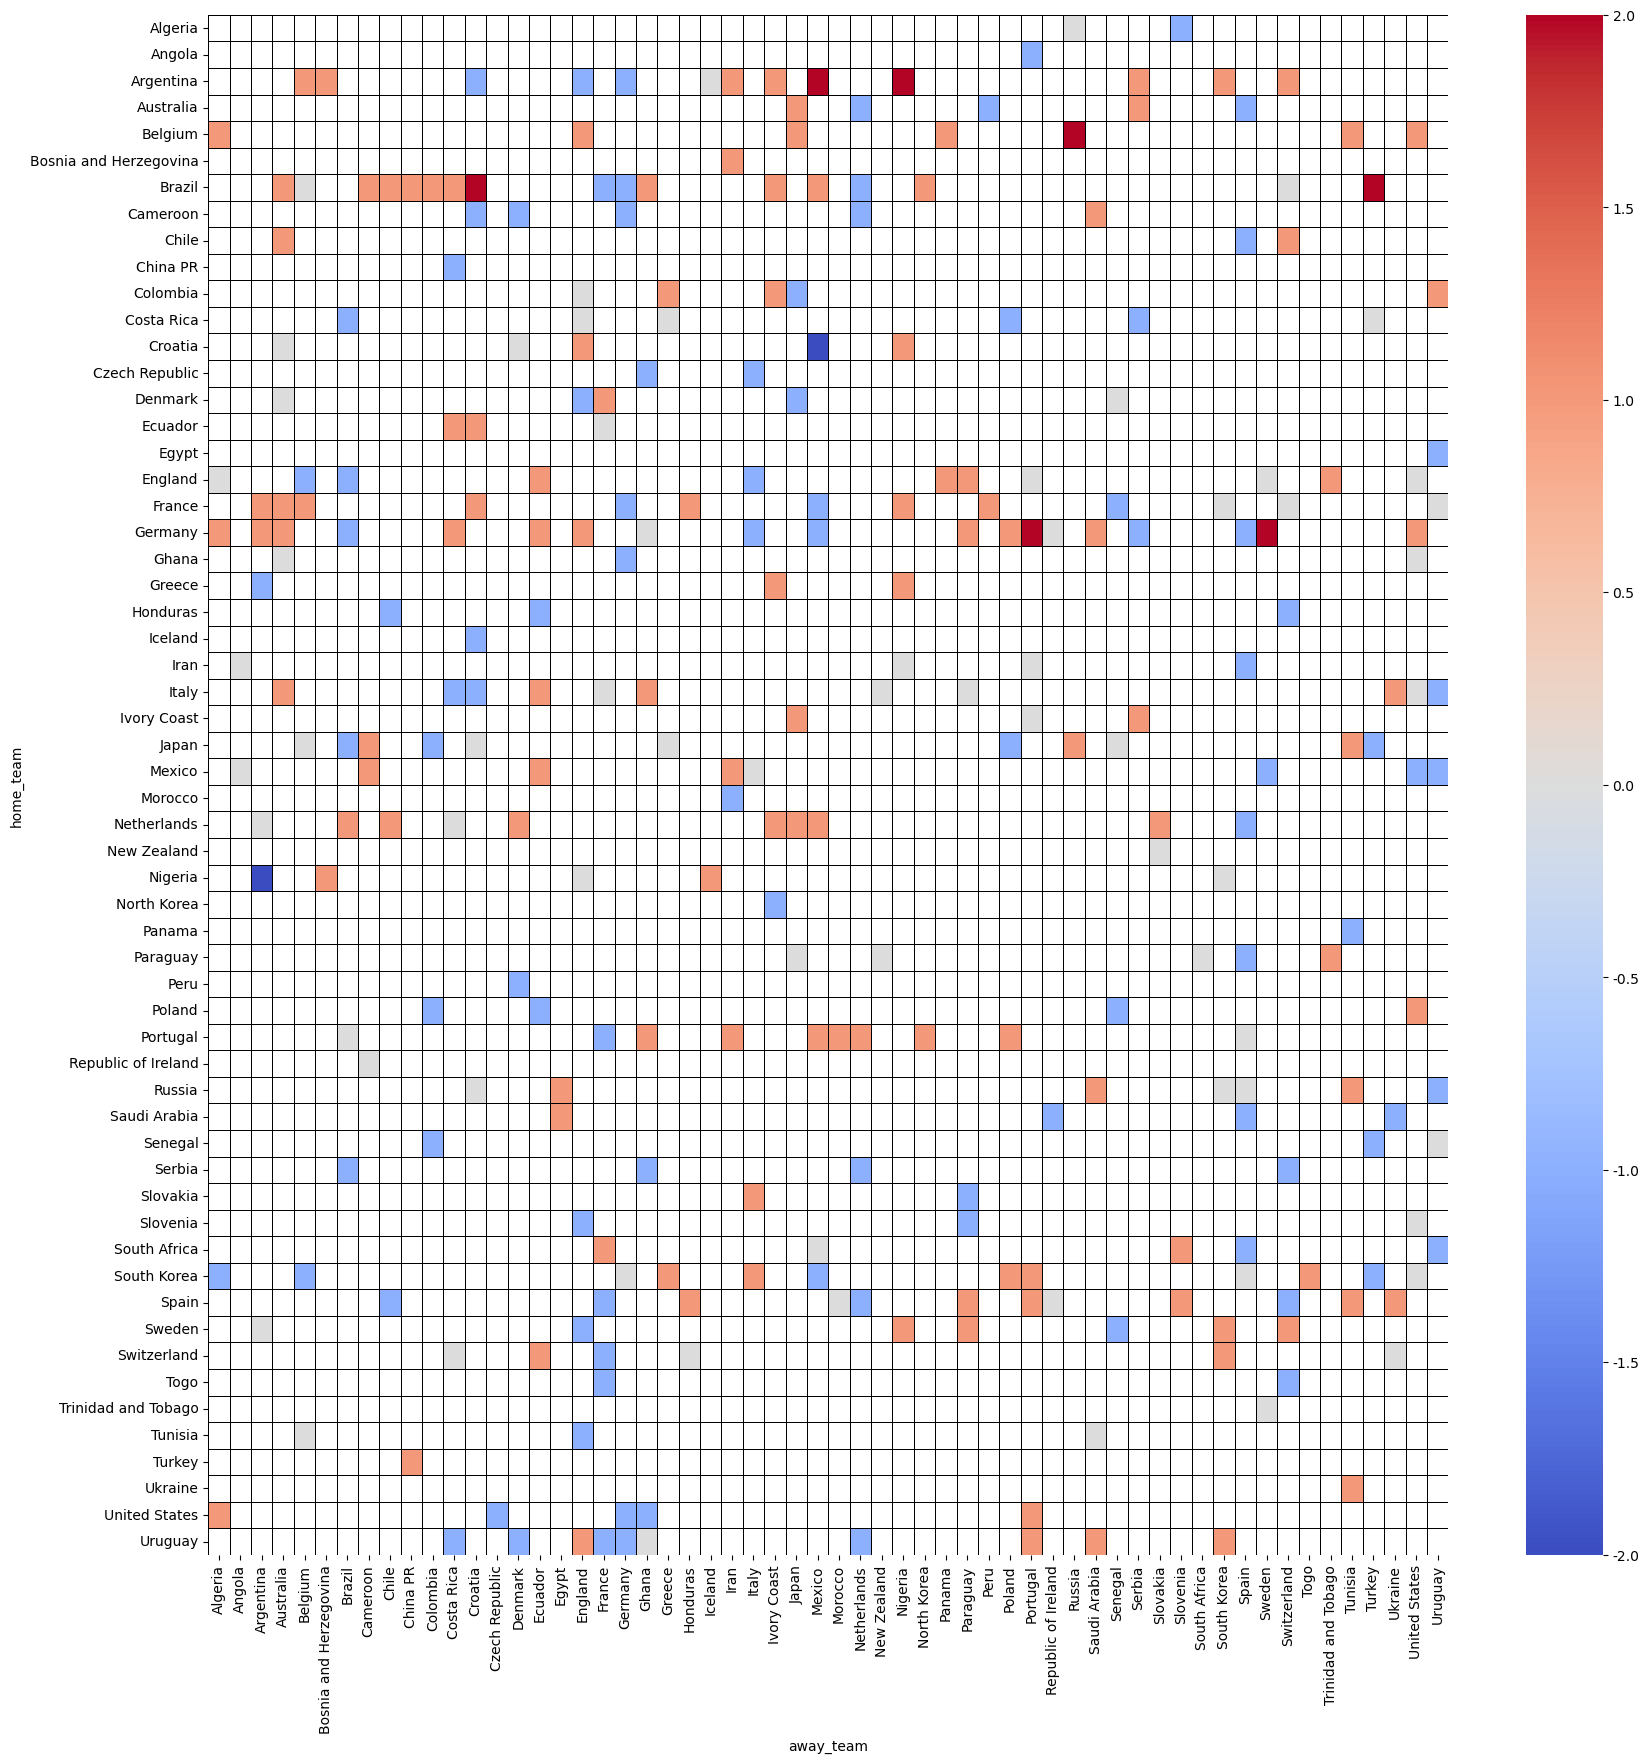

In [146]:
plt.figure(figsize=(20, 20))

sns.heatmap(pivot2, cmap="coolwarm", linewidths=.5, linecolor='black')

- 위 데이터는 2000년 이후 피파 월드컵에서 국가별로 승리한 횟수를 보여주는 히트맵이다.
- 붉은 계열이 많을수록 승리한 경험이 많은 국가라고 볼 수 있다.
- 아르헨티나, 브라질, 독일, 프랑스, 네덜란드, 포루투갈 등이 피파 월드컵 강국이라고 볼 수 있다.
- 반면 케메룬, 체코, 온두라스, 세르비아 등의 국가는 월드컵 본선에서는 부진한 결과를 보여줬다.
- 나이지리아는 특히 아르헨티나에게 약하다.
- 독일은 유독 포르투갈과 스웨덴에 강하다.
- 브라질은 크로아티아를 상대로 좋은 결과를 보여줬다.
- 벨기에는 유독 러시아에 강하다.